[Link for description of dataset](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)<br>
[Research paper](http://users.fs.cvut.cz/ivo.bukovsky/PROJEKT/Data/Realna/BIO/EEG/reference/PRE61907.pdf)<br>
[Kaggle](https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition)

Electroencephalography (EEG) is an electrophysiological monitoring method to record electrical activity of the brain.

### Short description of dataset

|Data Set Characteristics||Attribute Characteristics||Associated Tasks||Number of Instances||Number of Attributes||Missing Values?|
|---||---||---||---||---||---|
|Multivariate, Time-Series||Integer, Real||Classification, Clustering||11500||179||N/A|

### Plan
    - To be introduced with dataset description
    - Change the y target column (make a binary classification task)
    - Remove Unnamed: 0 column (additionaly check the importance of it)
    - EDA + Smart visualisation of data
    - Make pipelines for all the approaches for binary classification task + make a comperison table of results
    ----------------
    - PCA or ICA (from mne) --> reduce size of data
    - Use previous pipelines for reduced data + make a comperison table of results
    - Approaching with mne library
    - Model tuning!!!
    

In [1]:
#THIS IS DEFAULT KAGGLE CELL, WHICH DOWNLOAD OUR DATA TO PATH: /kaggle/input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv


First of all let us import all necessary libraries

In [33]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import plotly
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, iplot

import imblearn


import seaborn as sns

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

Let us got to the directory where we have our data (.csv file, named: Epileptic Seizure Recognition.csv)

Or alternatevily read data directly from web application (additionally we can download data locally)

In [2]:
#Read our data (from Kaggle)
data = pd.read_csv('Epileptic Seizure Recognition.csv')

In [4]:
#Have a look on first five rows
data.head(30)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,66,81,98,111,122,105,85,66,51,34,19,16,8,-5,-21,-18,-14,3,27,46,57,60,51,35,22,20,28,28,35,43,46,62,83,92,100,107,100,82,65,42,...,-91,-81,-36,-2,30,34,28,14,2,-1,-4,-17,-30,-45,-71,-81,-78,-69,-60,-45,-33,-25,-14,-2,3,-5,-18,-39,-61,-73,-77,-76,-79,-64,-40,-25,0,9,12,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,0,-38,-77,-113,-128,-121,-105,-71,-27,13,44,60,64,40,30,25,28,34,31,18,-19,-53,-76,-81,-74,-57,-36,-21,12,55,99,115,118,98,67,25,-16,-50,-66,-51,...,-42,-47,-42,-30,-22,-12,9,29,46,68,94,109,107,88,52,5,-24,-37,-50,-58,-66,-65,-60,-45,-20,1,23,50,74,99,125,141,129,95,41,-21,-77,-117,-135,-137,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,-19,-18,-16,-15,-14,-21,-19,-24,-24,-24,-17,-20,-23,-15,-17,-20,-18,-19,-20,-19,-18,-20,-25,-27,-24,-22,-20,-9,0,12,18,25,23,20,17,12,6,-1,-5,...,-8,-3,3,1,-4,-12,-15,-20,-25,-23,-20,-26,-24,-25,-35,-41,-41,-53,-61,-58,-59,-55,-53,-65,-78,-87,-97,-100,-106,-104,-107,-110,-110,-109,-104,-118,-111,-102,-80,-67,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,-63,-39,-11,14,36,60,70,78,79,69,27,-45,-123,-183,-218,-242,-256,-256,-236,-205,-165,-125,-84,-41,-10,12,35,58,71,85,98,107,106,97,77,46,-2,-77,-130,...,-87,-45,-3,29,45,52,50,51,59,64,74,79,81,76,65,63,62,65,67,70,63,45,20,-11,-32,-26,3,40,85,124,182,248,349,418,419,291,73,-152,-311,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,41,48,44,34,16,-2,-11,-24,11,33,43

In [5]:
#Have a look on last five rows
data.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,-63,-60,-57,-52,-46,-33,-27,-33,-32,...,-9,-15,-19,-20,-18,-14,0,9,21,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,-52,-67,-96,-123,-143,-155,-167,-176,-185,...,52,57,61,60,54,53,55,62,65,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,90,76,18,5,10,23,48,32,4,...,-43,-48,-44,-22,-17,18,50,45,-9,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,-77,-105,-110,-103,-89,-80,-81,-98,-113,...,-98,-103,-99,-81,-56,-61,-67,-111,-112,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,-71,-80,-74,-59,-44,-30,-17,-3,6,13,...,49,65,64,44,15,-14,-38,-68,-99,-107,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [8]:
#Check dataframe shape (11500 rows and 180 columns(features))
data.shape

(11500, 180)

So, after quick looking we observe weird names of features.<br>
Let us look throught description of features and target (y) feature also.

<b>From data description:</b> we divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.<br>

So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

Let us look more preciesly on <b>y</b> column and it's value's importance for our case.<br>

<b>y</b> contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:
 - 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
 - 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
 - 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
 - 2 - They recorder the EEG from the area where the tumor was located
 - 1 - Recording of seizure activity
All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

From the first view we can assume we need to solve **multi-classification task**, but, after accurate exploaring definitions of classes of <b>y</b>, we can realeyes we can *reform* our **multi-classification task** to **binary classification task**.<br>
For that we can just combine {2,3,4,5} classes as 0 class (not epileptic seizure) and keep {1} class as 1 (epileptic seizure).

In [6]:
#Before joining the classes, let us check y values for balancing
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

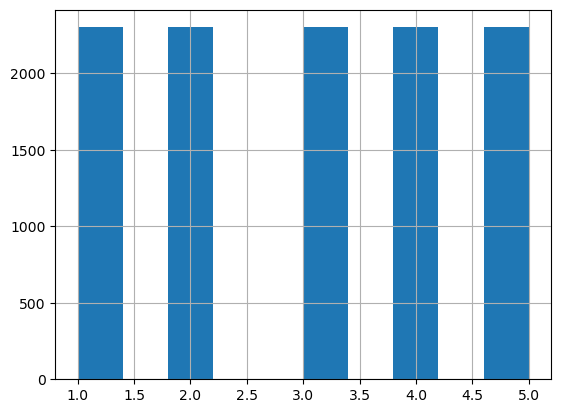

In [7]:
data.y.hist();

By the chance we faced with plotting, let us quickly plot few curves.<br>
As we can observe, it seems we have few types of curves. Let us keep it in our minds and analyse it during further steps.

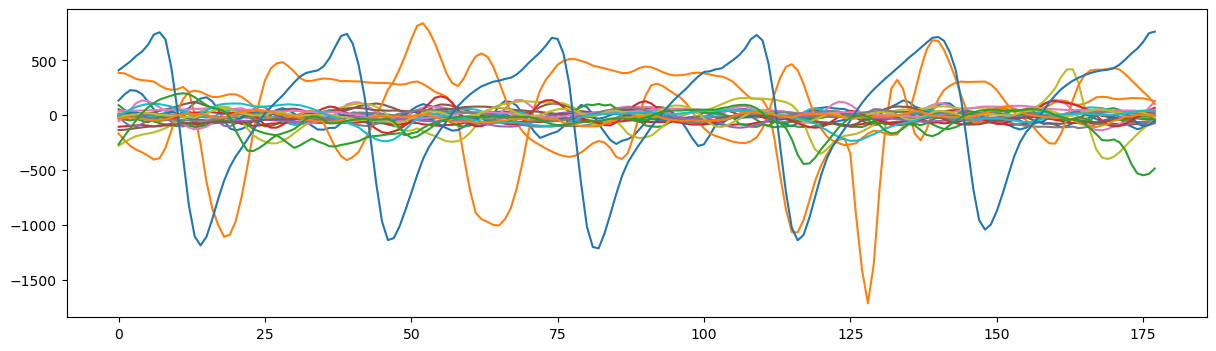

In [8]:
plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(data.values[i][1:-1]) for i in range(23)];

### Change the y target column (make a binary classification task)

In [9]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

In [10]:
#Check the difference in dataframe in general

#Check which values do we have in y column
print(data['y'].value_counts())

data.head()

y
0    9200
1    2300
Name: count, dtype: int64


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


### "Remove Unnamed" column (it has information which we don't need)

In [11]:
data = data.drop('Unnamed', axis = 1)

### Let us shuffle data because of previous manipulations

In [12]:
data = shuffle(data)

So, for now let us have a look on the description of our data. <br>
We can do it using several approaches:
 - 1) ususal: pd.description(), pd.info()
 - 2) ff.create_table (approach from plotly - in our case unnecessary, but we will use it for interesting)

In [16]:
# table_cat = ff.create_table(data.describe().T, index=True, index_title='Signals')
# iplot(table_cat)

In [13]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,...,-7.629391,-7.373565,-7.439913,-7.592348,-6.897652,-6.000348,-5.423913,-5.151043,-5.586870,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,161.197812,158.045513,157.490904,160.163082,163.996955,167.74431,171.232021,171.484787,169.299229,166.255922,...,158.301750,157.214361,158.679911,160.183325,162.002986,164.260512,166.182755,167.154785,167.414376,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, 5977 to 7841
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8 MB


Let us go further:

In [15]:
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


In [20]:
#Description of Non Epileptic
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [16]:
#Description of Epileptic

data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [17]:
print('Total Mean VALUE for Epileptic: {}'.format((data[data['y'] == 1].describe().mean()).mean()))
print('Total Std VALUE for Epileptic: {}'.format((data[data['y'] == 1].describe().std()).std()))

Total Mean VALUE for Epileptic: 290.129360958884
Total Std VALUE for Epileptic: 53.56315864740058


In [18]:
print('Total Mean VALUE for NON Epileptic: {}'.format((data[data['y'] == 0].describe().mean()).mean()))
print('Total Std VALUE for NON Epileptic: {}'.format((data[data['y'] == 0].describe().std()).std()))

Total Mean VALUE for NON Epileptic: 1260.098927262616
Total Std VALUE for NON Epileptic: 15.561044289100966


We can see quiet big difference, probably, we wiil demand to normalize/scale our data. 

### Let us plot and have a look on EPILIPTIC and NOT EPILETTIC occureses

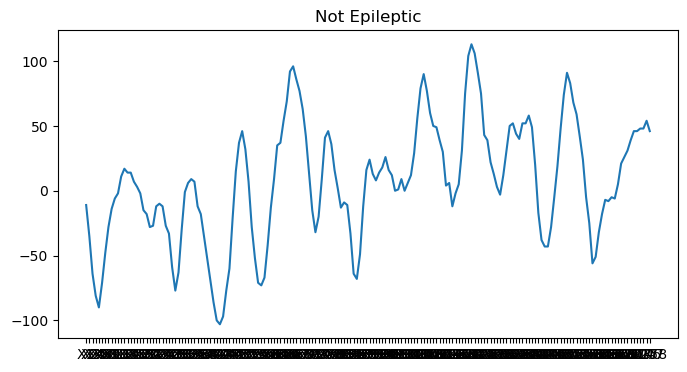

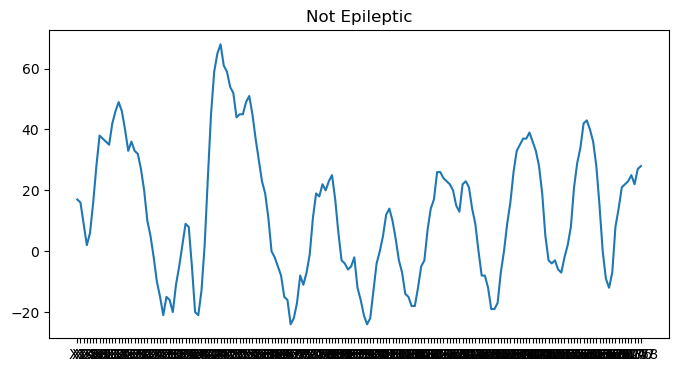

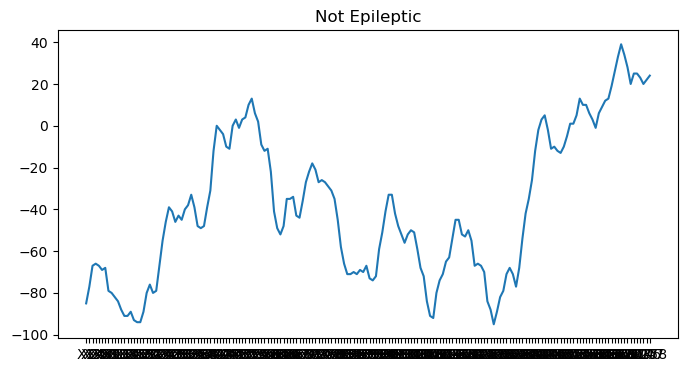

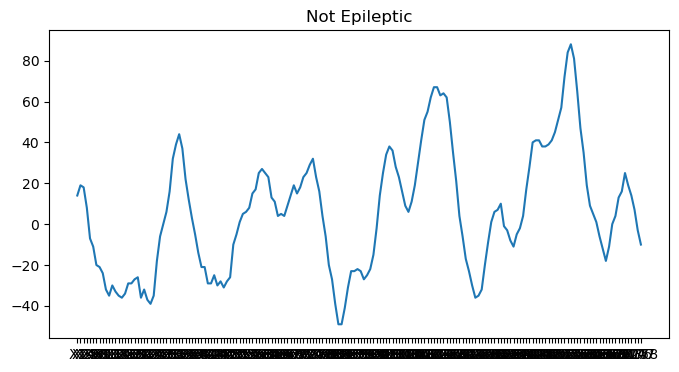

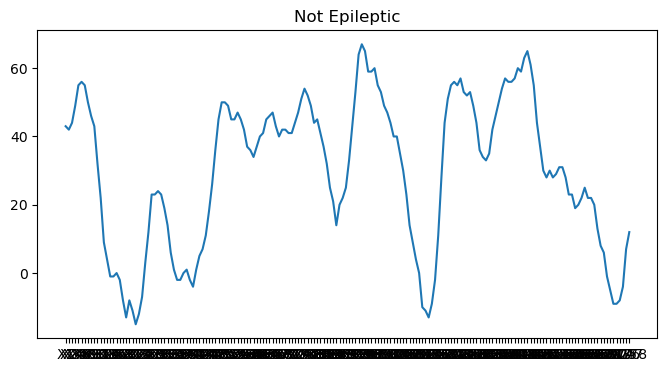

In [19]:
#Few cases of Not Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(data[data['y'] == 0].iloc[i][0:-1])) for i in range(5)];

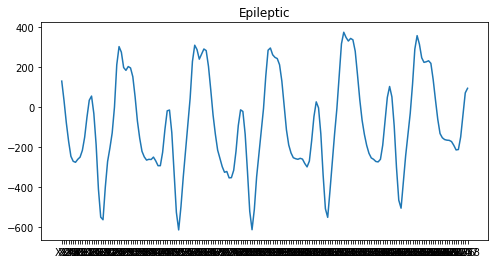

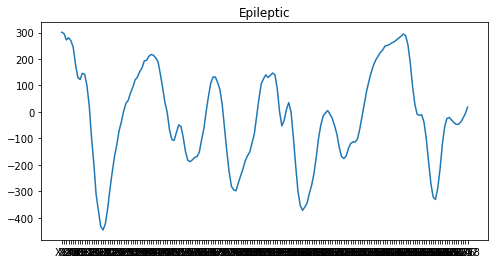

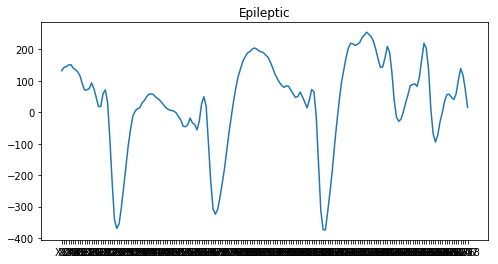

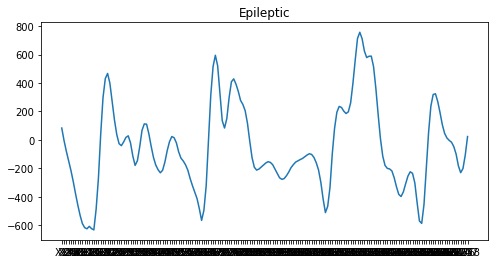

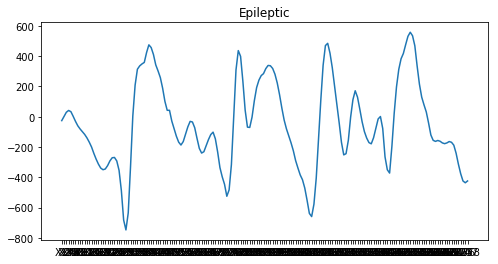

In [25]:
#Few cases of Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(data[data['y'] == 1].iloc[i][0:-1])) for i in range(5)];

So, as we can observe, records of Epileptic seusizes are more smooth and looks like have a tendency.

### Let us make a scatter plot of values for Epiletpic and Not Epileptic occureses

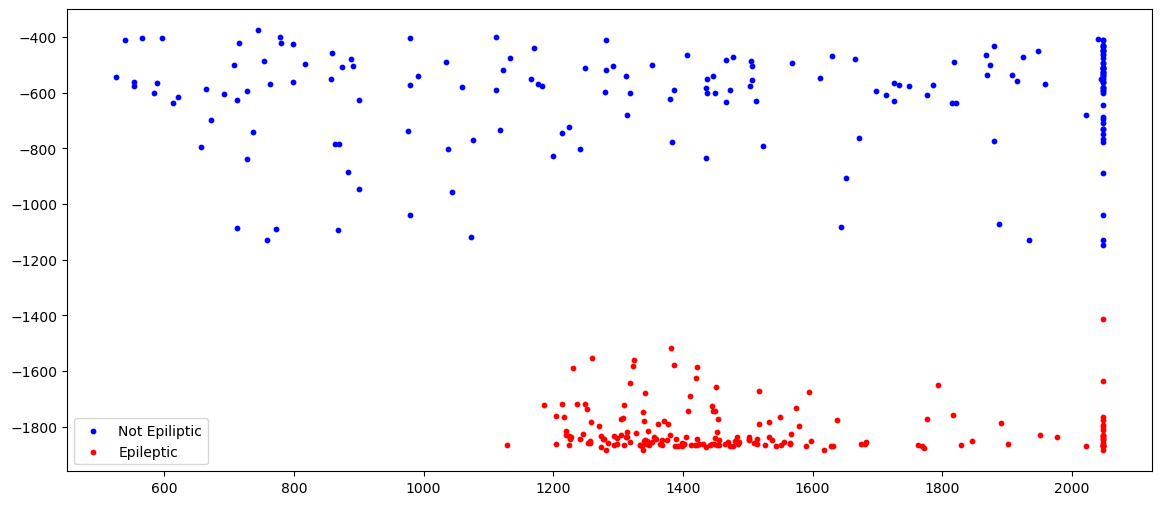

In [20]:
#lists of arrays containing all data without y column
not_epileptic = [data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values]
epileptic = [data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values]

#We will create and calculate 2d indicators in order plot data in 2 dimensions;

def indic(data):
    """Indicators can be different. In our case we use just min and max values
    Additionally, it can be mean and std or another combination of indicators"""
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()

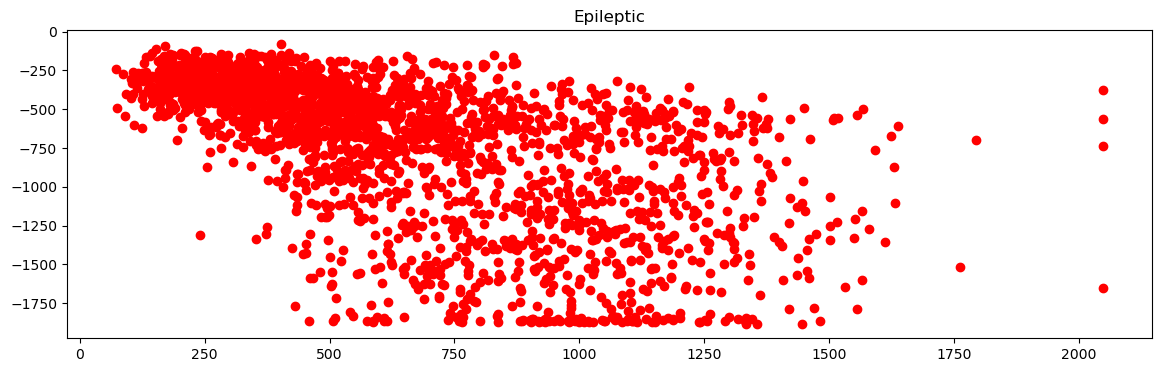

In [21]:
#Just Epileptic
x,y = indic(data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r');

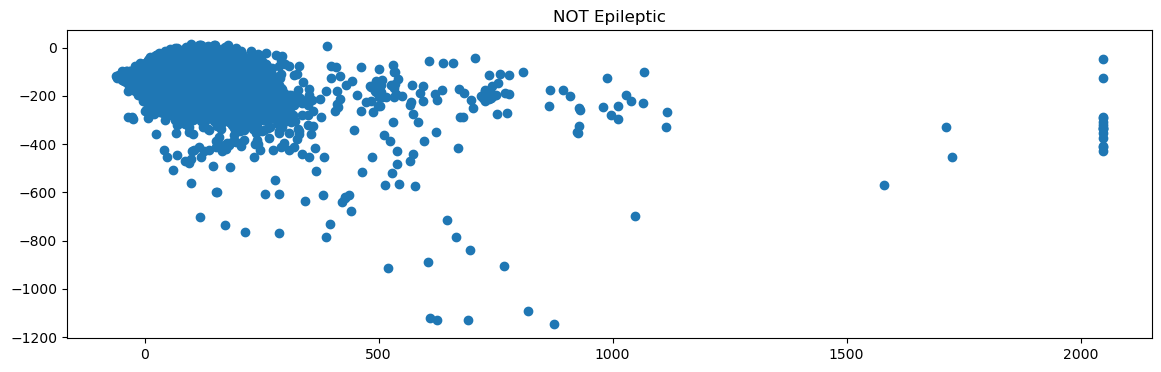

In [22]:
#Just Not Epileptic
x,y = indic(data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('NOT Epileptic')
plt.scatter(x, y);

### After all, let us go further with ML models. 

As we realyesed earlier, we can try to normalize data. Let us do it. But before that we will use undersampling approach in order to prevent imbalanced issue

In [23]:
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

Check the balance for y

In [25]:
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epileptic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 18400 VS Epileptic 18400


Normalizing

In [26]:
# X = data.drop('y', axis=1)
# y = data['y']

normalized_df = pd.DataFrame(normalize(X))
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,0.045353,0.049476,-0.003638,-0.056752,-0.086584,-0.089252,-0.085614,-0.078338,-0.069849,-0.063301,-0.040503,-0.039048,-0.027649,-0.025223,-0.038077,-0.044141,-0.047051,-0.038320,-0.020615,-0.001940,0.007033,0.010186,0.010914,0.010914,0.013824,0.017705,0.025708,0.034682,0.043171,0.048264,0.049961,0.048264,0.045353,0.042443,0.038320,0.034925,0.031529,0.028861,0.025708,0.022555,0.021100,0.014794,0.023283,0.044383,0.067424,0.074942,0.056025,0.031772,-0.019160,-0.071062,...,0.071304,0.035167,0.007518,0.007518,0.091919,0.176805,0.268967,0.214640,0.071789,-0.082461,-0.186507,-0.193297,-0.152310,-0.131452,-0.120053,-0.130239,-0.152310,-0.161283,-0.154735,-0.128784,-0.097498,-0.070092,-0.048264,-0.037107,-0.045111,-0.060148,-0.076882,-0.077610,-0.069849,-0.042686,-0.022070,0.013339,0.019645,0.015037,-0.001698,-0.010671,-0.013582,0.000485,0.019888,0.032742,0.040988,0.046081,0.049719,0.049961,0.063786,0.067909,0.079793,0.082703,0.077853,0.067181
1,-0.017816,-0.056687,-0.103657,-0.131191,-0.145768,-0.114995,-0.077743,-0.045350,-0.022675,-0.009718,-0.003239,0.017816,0.027534,0.022675,0.022675,0.011337,0.004859,-0.003239,-0.024295,-0.029154,-0.045350,-0.043730,-0.019436,-0.016196,-0.019436,-0.043730,-0.053448,-0.095559,-0.124712,-0.102037,-0.048589,-0.001620,0.009718,0.014577,0.011337,-0.019436,-0.029154,-0.056687,-0.084221,-0.111755,-0.139289,-0.161964,-0.166823,-0.157105,-0.124712,-0.097179,-0.034012,0.024295,0.059927,0.074504,...,0.021055,0.004859,-0.004859,0.019436,0.050209,0.080982,0.084221,0.071264,0.064786,0.084221,0.084221,0.093939,0.079362,0.032393,-0.027534,-0.061546,-0.069645,-0.069645,-0.045350,-0.008098,0.030773,0.077743,0.119853,0.147387,0.134430,0.110136,0.095559,0.068025,0.038871,-0.008098,-0.040491,-0.090700,-0.082602,-0.051829,-0.029154,-0.011337,-0.012957,-0.008098,-0.009718,0.008098,0.034012,0.042111,0.050209,0.063166,0.074504,0.074504,0.077743,0.077743,0.087461,0.074504
2,0.050721,0.047737,0.026852,0.005967,0.017901,0.047737,0.083540,0.113375,0.110392,0.107408,0.104425,0.125310,0.137244,0.146194,0.137244,0.119342,0.098457,0.107408,0.098457,0.095474,0.080556,0.059671,0.029836,0.014918,-0.005967,-0.029836,-0.044753,-0.062655,-0.044753,-0.047737,-0.059671,-0.032819,-0.014918,0.005967,0.026852,0.023868,-0.014918,-0.059671,-0.062655,-0.038786,0.005967,0.071605,0.134260,0.176030,0.193931,0.202882,0.181997,0.176030,0.161112,0.155145,...,-0.023868,-0.035803,-0.056688,-0.056688,-0.050721,-0.020885,0.000000,0.026852,0.047737,0.077573,0.098457,0.104425,0.110392,0.110392,0.116359,0.107408,0.098457,0.083540,0.056688,0.014918,-0.008951,-0.011934,-0.008951,-0.017901,-0.020885,-0.005967,0.005967,0.023868,0.062655,0.086523,0.101441,0.125310,0.128293,0.119342,0.107408,0.083540,0.044753,0.000000,-0.026852,-0.035803,-0.020885,0.023868,0.041770,0.062655,0.065638,0.068622,0.074589,0.065638,0.080556,0.083540
3,-0.121738,-0.110280,-0.095958,-0.094526,-0.095958,-0.098822,-0.097390,-0.113144,-0.114576,-0.117441,-0.120305,-0.126034,-0.130331,-0.130331,-0.127466,-0.133195,-0.134627,-0.134627,-0.127466,-0.114576,-0.108848,-0.114576,-0.113144,-0.095958,-0.078771,-0.065881,-0.055856,-0.058720,-0.065881,-0.061585,-0.064449,-0.057288,-0.054424,-0.047263,-0.055856,-0.068746,-0.070178,-0.068746,-0.055856,-0.044398,-0.017186,0.000000,-0.002864,-0.005729,-0.014322,-0.015754,0.000000,0.004297,-0.001432,0.004297,...,-0.136060,-0.127466,-0.117441,-0.113144,-0.101687,-0.097390,-0.101687,-0.110280,-0.097390,-0.077339,-0.060153,-0.050127,-0.037237,-0.017186,-0.002864,0.004297,0.007161,-0.002864,-0.015754,-0.014322,-0.017186,-0.018619,-0.014322,-0.007161,0.001432,0.001432,0.007161,0.018619,0.014322,0.014322,0.008593,0.0042

In [27]:
#Concat back in order to check description:
normalized_df['y'] = y

print('Normalized Total Mean VALUE for Epileptic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().mean()).mean()))
print('Normalized Total Std VALUE for Epileptic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().std()).std()))

print('Normalized Total Mean VALUE for NOT Epileptic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().mean()).mean()))
print('Normalized Total Std VALUE for NOT Epileptic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().std()).std()))

Normalized Total Mean VALUE for Epileptic: 1150.0134201483465
Normalized Total Std VALUE for Epileptic: 0.02256031798798758
Normalized Total Mean VALUE for NOT Epileptic: 1150.0065271687797
Normalized Total Std VALUE for NOT Epileptic: 0.0020074295510300252


In [28]:
#Let us split our dataset on train and test and than invoke validation approach

X = normalized_df.drop('y', axis=1)
y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(12880, 178), (5520, 178), (12880,), (5520,)]

Make a pipeline for Classification models:
- LogisticRegression
- Support Vector Machines - linear and rbf
- K-nearest Classifier
- Decision Tree Classifier
- Gradient Bossting Classifier

In [29]:
#Define set of classifiers for input
models = [RandomForestClassifier()]

#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)

# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Score', 'Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions
    return df_result

['RandomForestClassifier']


In [30]:
classifiers(models)

Initialized classifier RandomForestClassifier with default parameters 

Score of classifier RandomForestClassifier is: 0.9822463768115942 



,Score,Predictions
RandomForestClassifier,98.22%,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, ..."


Tuning Hyperparameters

In [35]:
### RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = KFold(n_splits=3, random_state=None)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.962811 using {'max_features': 'log2', 'n_estimators': 1000}
0.923758 (0.004842) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.957609 (0.005485) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.962345 (0.005090) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.920652 (0.000588) with: {'max_features': 'log2', 'n_estimators': 10}
0.956832 (0.001613) with: {'max_features': 'log2', 'n_estimators': 100}
0.962811 (0.003279) with: {'max_features': 'log2', 'n_estimators': 1000}


In [36]:
pip install Streamlit


  Obtaining dependency information for Streamlit from https://files.pythonhosted.org/packages/c5/ea/b50f166fb6e5c244568f798ade98fa261b82588ab9ad83230b327a82b42f/streamlit-1.31.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/ad/6e/1bed3b7c904cc178cb8ee8dbaf72934964452b3de95b7a63412591edb